In [284]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [285]:
df = pd.read_csv('baseball.csv')
df = df.drop('name', axis=1)
dim_df = df.shape
print(f"The dataset consists of {dim_df[0]} rows and {dim_df[1]} columns")

The dataset consists of 132 rows and 13 columns


In [286]:
df.dtypes

salary           int64
batting        float64
OBP            float64
runs             int64
hits             int64
dooubles         int64
tripes           int64
homeruns         int64
RBI              int64
walks            int64
strikeouts       int64
stolenbases      int64
errors           int64
dtype: object

Let’s check how much missing data there is by columns

In [287]:
# Missing values by column
df.isnull().sum()

salary         0
batting        0
OBP            0
runs           0
hits           0
dooubles       0
tripes         0
homeruns       0
RBI            0
walks          0
strikeouts     0
stolenbases    0
errors         0
dtype: int64

# Descriptive Statistics

In [288]:
df.describe()

,salary,batting,OBP,runs,hits,dooubles,tripes,homeruns,RBI,walks,strikeouts,stolenbases,errors
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2139.242424,0.260833,0.334364,57.431818,111.310606,19.598485,2.515152,12.454545,55.219697,45.803030,65.174242,8.962121,6.613636
std,1225.598699,0.037279,0.044794,27.614078,45.447920,9.941708,2.435378,10.373457,28.923514,24.351259,33.043459,12.094668,5.458585
min,109.000000,0.063000,0.063000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
25%,1043.750000,0.243000,0.308750,37.000000,72.000000,12.000000,1.000000,3.000000,32.750000,28.000000,40.000000,2.000000,3.000000
50%,2179.000000,0.260500,0.338500,57.500000,113.000000,18.000000,2.000000,10.000000,50.000000,42.500000,60.500000,4.000000,5.000000
75%,2923.000000,0.285000,0.361500,77.250000,146.250000,27.000000,4.000000,19.000000,75.000000,59.000000,84.250000,11.000000,9.000000
max,6100.000000,0.341000,0.424000,133.000000,216.000000,46.000000,13.000000,44.000000,133.000000,108.000000,175.000000,72.000000,31.000000


Histograms

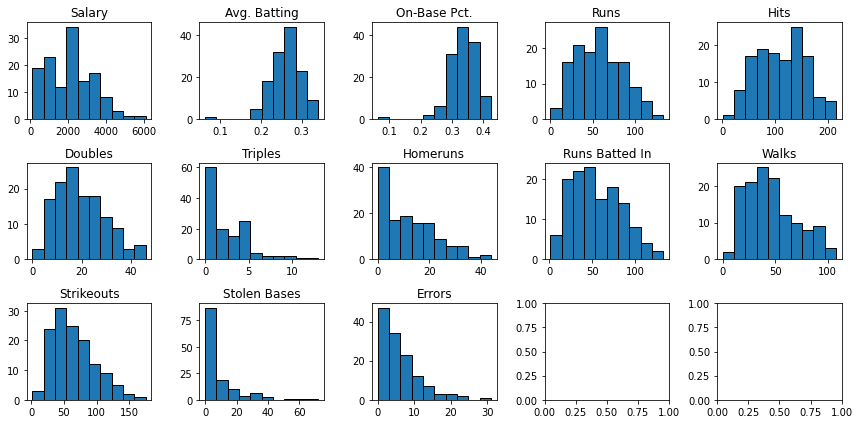

In [289]:
col_titles = ['Salary', 'Avg. Batting', 'On-Base Pct.', 'Runs', 'Hits', 'Doubles', 'Triples', 'Homeruns', 
               'Runs Batted In', 'Walks', 'Strikeouts', 'Stolen Bases', 'Errors']
fig, axs = plt.subplots(3, 5, figsize=(12,6))
axs = axs.ravel()
for i, col in enumerate(df.columns):
    axs[i].hist(df[col], edgecolor='black')
    axs[i].set_title(col_titles[i])
    
plt.tight_layout()
plt.show()

Boxplots

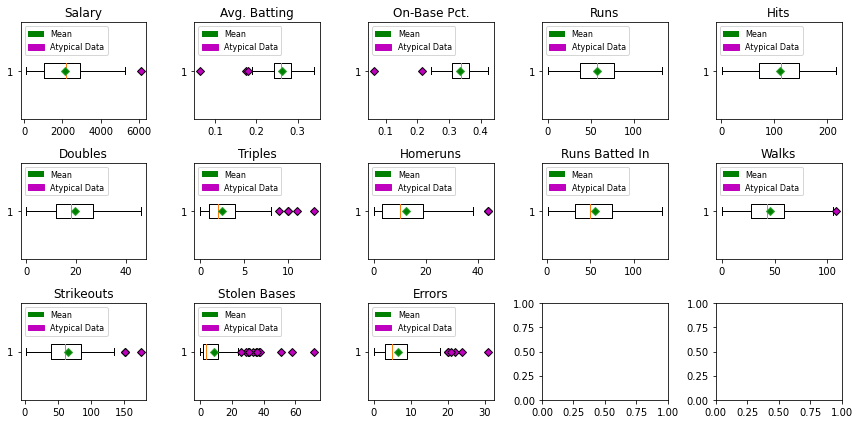

In [290]:
import matplotlib.patches as mpatches

fliers = dict(markerfacecolor='m', marker='D') #atypical data
mean_ = dict(markerfacecolor='green', marker='D')
mean_artist = mpatches.Patch(facecolor='green', label='Mean')
ad_artist = mpatches.Patch(color='m', label='Atypical Data')

fig, axs = plt.subplots(3, 5, figsize=(12,6))
axs = axs.ravel()
for i, col in enumerate(df.columns):
  bp = axs[i].boxplot(df[col], vert=False, flierprops=fliers, showmeans=True, meanprops=mean_)
  axs[i].legend(handles=[mean_artist, ad_artist], loc='upper left', fontsize=8)
  axs[i].set_title(col_titles[i])

plt.tight_layout()
plt.show()

Correlation

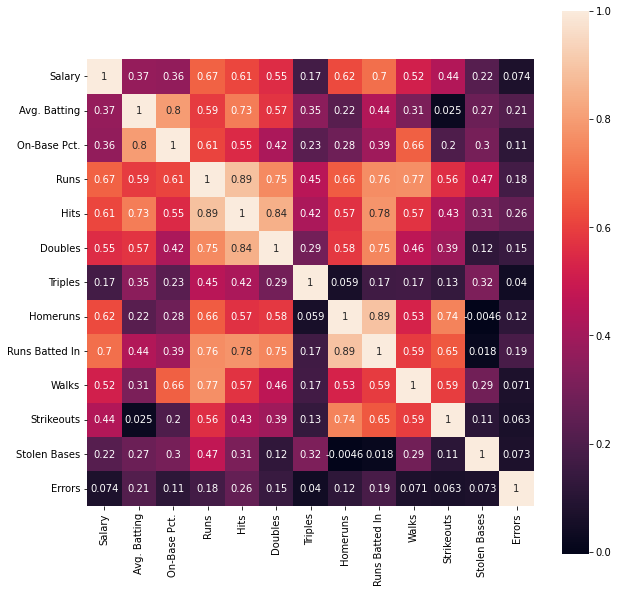

In [291]:
fig, ax = plt.subplots(figsize=(10, 10))
corr_matrix = df.corr()
corr_matrix = corr_matrix.rename(columns=dict(zip(corr_matrix.columns, col_titles)))
corr_matrix = corr_matrix.rename(index=dict(zip(corr_matrix.index, col_titles)))
sns.heatmap(corr_matrix, square=True, annot=True, ax=ax)
plt.show()

Normality Test for the data

In [292]:
from scipy.stats import shapiro

for col in df.columns:
    data = df[col].tolist()
    stat, p = shapiro(data)
    ans = 'son normales' if p > 0.05 else 'no son normales'
    print(f'Los datos de la variable {col} {ans}')

Los datos de la variable salary no son normales
Los datos de la variable batting no son normales
Los datos de la variable OBP no son normales
Los datos de la variable runs son normales
Los datos de la variable hits son normales
Los datos de la variable dooubles no son normales
Los datos de la variable tripes no son normales
Los datos de la variable homeruns no son normales
Los datos de la variable RBI no son normales
Los datos de la variable walks no son normales
Los datos de la variable strikeouts no son normales
Los datos de la variable stolenbases no son normales
Los datos de la variable errors no son normales


# Linear Regression Model

Dataset split into train and test

In [293]:
# Agregando una columna de unos para el intercepto
df = sm.add_constant(df)

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('salary', axis=1), 
                                                    df['salary'], test_size=0.2, random_state=123)

In [295]:
# Fitting the regression model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     7.935
Date:                Wed, 03 May 2023   Prob (F-statistic):           5.68e-10
Time:                        19:55:55   Log-Likelihood:                -858.10
No. Observations:                 105   AIC:                             1742.
Df Residuals:                      92   BIC:                             1777.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         610.4817    825.541      0.739      

In [296]:
print('Coefficients LR')
print(model.params)

Coefficients LR
const           610.481682
batting        2222.330221
OBP           -1638.854103
runs              7.362492
hits              0.779417
dooubles        -15.887854
tripes          -28.062148
homeruns         16.940114
RBI              23.486874
walks             2.773515
strikeouts       -4.609948
stolenbases      14.928319
errors          -19.770148
dtype: float64


Significant variables for the model

In [297]:
print('p-values variables')
print(model.pvalues)

p-values variables
const          0.461490
batting        0.846156
OBP            0.851743
runs           0.655638
hits           0.936797
dooubles       0.425598
tripes         0.587896
homeruns       0.555018
RBI            0.057780
walks          0.840817
strikeouts     0.325847
stolenbases    0.225035
errors         0.238081
dtype: float64


Metrics to check the model

In [298]:
from sklearn.metrics import mean_squared_error

y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(f'MSE for the LR Model: {mse}')

MSE for the LR Model: 472509.2342122604


El modelo de regresión lineal de todas las variables tiene un R-cuadrado ajustado de 0.445, lo que sugiere que alrededor del 44.5% de la variabilidad de la variable de respuesta (salario) puede explicarse por las variables predictoras incluidas en el modelo. 

Algunos de los coeficientes de regresión tienen p-valores altos, lo que sugiere que no son estadísticamente significativos. Por ejemplo, el coeficiente para "hits" tiene un p-valor de 0.936797, lo que sugiere que no es una variable significativa para predecir el salario. Además, la variable "RBI" tiene un p-valor marginalmente significativo (0.057780), lo que sugiere que puede ser una variable importante, pero se necesita más análisis para confirmar su importancia.

Con respecto al MSE, el valor obtenido indica que hay una alta varianza entre los valores predichos por el modelo y los valores reales de la variable objetivo. En otras palabras, el modelo no se ajusta bien a los datos y tiene un rendimiento insuficiente en la tarea de predicción. Esto puede ocurrir debido a que hay variables que estan muy correlacionadas, hay valores de 0.89 y 0.84

### Modelos Propuestos:

Seleccion de las mejores variables usando un enfoque voraz. En cada etapa, este estimador elige la mejor característica para añadir basándose en la puntuación de validación cruzada de un estimador.

In [299]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_copy = df.copy()
df_copy = df_copy.drop('const', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop('salary', axis=1), 
                                                    df_copy['salary'], test_size=0.2, random_state=123)

# Model
model = LinearRegression().fit(X_train, y_train)
sfs = SequentialFeatureSelector(model, direction='forward', n_features_to_select=3)
sfs.fit(X_train, y_train)

# Variables seleccionadas
selected_features = X_train.columns[sfs.get_support()]
print("Variables seleccionadas:", selected_features)

# Entrenar el modelo con las variables seleccionadas
X_selected = X_train.iloc[:, sfs.get_support()]
model_final = LinearRegression().fit(X_selected, y_train)
coef_dict = dict(zip(X_selected.columns, model_final.coef_))
coef_dict['intercept'] = model_final.intercept_
print(coef_dict)
y_pred_selected = model_final.predict(X_test.iloc[:, sfs.get_support()])
mse_selected = mean_squared_error(y_test, y_pred_selected)
print(f"MSE del modelo con variables seleccionadas: {mse_selected}")


Variables seleccionadas: Index(['runs', 'tripes', 'homeruns'], dtype='object')
{'runs': 21.996696479214034, 'tripes': -57.43388406557736, 'homeruns': 32.45593597987061, 'intercept': 578.0977492624365}
MSE del modelo con variables seleccionadas: 500367.14098529215


Quitando pares de variables con alta correlacion, hits-runs (0.89)

In [300]:
df_copy = df.copy()
df_copy = df_copy.drop(['hits', 'runs'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop('salary', axis=1), 
                                                    df_copy['salary'], test_size=0.2, random_state=123)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     9.664
Date:                Wed, 03 May 2023   Prob (F-statistic):           6.62e-11
Time:                        19:55:57   Log-Likelihood:                -858.28
No. Observations:                 105   AIC:                             1739.
Df Residuals:                      94   BIC:                             1768.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         563.4073    805.423      0.700      

In [301]:
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(f'MSE for the LR Model: {mse}')

MSE for the LR Model: 488929.61951423663


Quitando pares de variables con alta correlacion, hits-runs (0.89) y dooubles-homeruns (0.84)

In [302]:
df_copy = df.copy()
df_copy = df_copy.drop(['hits', 'runs', 'dooubles', 'homeruns'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop('salary', axis=1), 
                                                    df_copy['salary'], test_size=0.2, random_state=123)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     11.98
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.03e-11
Time:                        19:55:58   Log-Likelihood:                -859.06
No. Observations:                 105   AIC:                             1736.
Df Residuals:                      96   BIC:                             1760.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         510.0526    797.551      0.640      

In [303]:
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(f'MSE for the LR Model: {mse}')

MSE for the LR Model: 451816.86700758204


Quitando pares de variables con alta correlacion, hits-runs (0.89) y OBP-batting (0.8)

In [304]:
df_copy = df.copy()
df_copy = df_copy.drop(['hits', 'runs', 'OBP', 'batting'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop('salary', axis=1), 
                                                    df_copy['salary'], test_size=0.2, random_state=123)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     12.22
Date:                Wed, 03 May 2023   Prob (F-statistic):           6.53e-12
Time:                        19:55:58   Log-Likelihood:                -858.53
No. Observations:                 105   AIC:                             1735.
Df Residuals:                      96   BIC:                             1759.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         643.0386    265.933      2.418      

In [305]:
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(f'MSE for the LR Model: {mse}')

MSE for the LR Model: 496001.73702509375


Modelo eliminando las variables con mayor p-value del modelo completo:

In [306]:
df_copy = df.copy()
df_copy = df_copy.drop(['hits', 'walks', 'OBP', 'batting'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop('salary', axis=1), 
                                                    df_copy['salary'], test_size=0.2, random_state=123)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     12.39
Date:                Wed, 03 May 2023   Prob (F-statistic):           4.74e-12
Time:                        19:55:59   Log-Likelihood:                -858.16
No. Observations:                 105   AIC:                             1734.
Df Residuals:                      96   BIC:                             1758.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         638.8948    264.001      2.420      

In [307]:
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(f'MSE for the LR Model: {mse}')

MSE for the LR Model: 465509.7083045767


Modelo teniendo en cuenta un analisis de PCA:

suma: 0.982670851047459


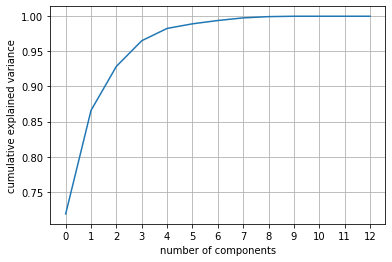

In [308]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
pca.fit(df.drop(['salary'], axis=1)) 
X_pca = pca.fit_transform(df.drop(['salary'], axis=1))

expl = pca.explained_variance_ratio_
print('suma:',sum(expl[0:5]))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.xticks(np.arange(0, df.shape[1]-1, 1.0))

plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [309]:
X_pca_df = pd.DataFrame(X_pca[:, :5], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
X_pca_df['salary'] = df['salary']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca_df.drop('salary', axis=1), X_pca_df['salary'], test_size=0.2, random_state=123)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.120
Model:                            OLS   Adj. R-squared (uncentered):              0.076
Method:                 Least Squares   F-statistic:                              2.738
Date:                Wed, 03 May 2023   Prob (F-statistic):                      0.0232
Time:                        19:56:00   Log-Likelihood:                         -960.29
No. Observations:                 105   AIC:                                      1931.
Df Residuals:                     100   BIC:                                      1944.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [310]:
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(f'MSE for the LR Model: {mse}')

MSE for the LR Model: 6045180.400770556


RESUMEN DE RESULTADOS

| Modelo                          | MSE          |
|---------------------------------|--------------|
| Modelo 2 elimnado correlaciones | 451,816.87   |
| Modelo sin p-values grandes     | 465,509.71   |
| Modelo Completo                 | 472,509.23   |
| Modelo 1 elimnado correlaciones | 488,929.62   |
| Modelo 3 elimnado correlaciones | 496,001.74   |
| Modelo Greedy                   | 500,367.14   |
| Modelo PCA                      | 6,045,180.40 |

# Punto 2

In [311]:
df2 = pd.read_csv('fertility.csv')
df2 = df2.drop(['voc_train', 'german'], axis=1)
dim_df = df2.shape
print(f"The dataset consists of {dim_df[0]} rows and {dim_df[1]} columns")

The dataset consists of 1243 rows and 7 columns


In [312]:
df2.isnull().sum()

children        0
years_school    0
university      0
religion        0
year_birth      0
rural           0
age_marriage    0
dtype: int64

Convert cathegorical data to numerical

In [313]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_vars = ['university', 'religion', 'rural']
for var in categorical_vars:
    df2[var] = le.fit_transform(df2[var])
df2

,children,years_school,university,religion,year_birth,rural,age_marriage
0,2,8,0,0,42,1,20
1,3,8,0,0,55,1,21
2,2,8,0,0,51,1,24
3,4,8,0,0,54,0,26
4,2,8,0,0,46,1,22
...,...,...,...,...,...,...,...
1238,2,13,1,1,45,1,23
1239,2,13,1,1,41,0,25
1240,2,13,1,1,56,0,25
1241,2,13,1,1,58,0,25


In [314]:
X_train = df2.drop('children', axis=1)
y_train = df2['children']

### Poisson Model

In [315]:
model_poisson = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(model_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               children   No. Observations:                 1243
Model:                            GLM   Df Residuals:                     1237
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2209.3
Date:                Wed, 03 May 2023   Deviance:                       1249.3
Time:                        19:56:01   Pearson chi2:                 1.30e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           -0.03683
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
years_school     0.0873      0.016      5.543   

Primeramente podemos hacer un analisis de significancia de las variables del modelo con respecto a su valor p. Como se puede ver en la tabla, todas las variables, excepto "religion" y "age_marriage", tienen valores p menores a 0.05, lo que indica que son estadísticamente significativas en el modelo. Por otro lado, como el valor p de "religion" y "age_marriage" son 0.119 > 0.05 y  0.066 > 0.05, respectivamente, no se puede afirmar que estas variable tengan un efecto significativo en el modelo.

El coeficiente negativo de "university", al ser una variable categorica binaria (si/no), sugiere que las mujeres con esta característica (es decir, un "si") tienen menos hijos.

Por otro lado, el coeficientes positivo de "rural" sugiere que las mujeres con estas caracteristica tienen mas hijos.

### Negative Binomial Model

Si la razón entre el Chi-cuadrado y los grados de libertad es mayor a 1, entonces existe sobredispersión.

En este caso, el Pearson Chi-cuadrado es de 1300, con 1237 grados de libertad, lo que resulta en una razón de 1.0509. Como esta razón es mayor a 1, se puede concluir que los datos presentan sobredispersión.

In [316]:
model_nb = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial()).fit()
print(model_nb.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               children   No. Observations:                 1243
Model:                            GLM   Df Residuals:                     1237
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.0
Date:                Wed, 03 May 2023   Deviance:                       429.50
Time:                        19:56:01   Pearson chi2:                     389.
No. Iterations:                     6   Pseudo R-squ. (CS):           -0.01113
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
years_school     0.0877      0.029      2.991   

Para comparar los 2 modelos usaremos el AIC (Akaike Information Criterion), que es un criterio de selección de modelos que busca equilibrar la complejidad del modelo con su capacidad para ajustarse a los datos. El AIC se calcula a partir del logaritmo de la función de verosimilitud del modelo y su complejidad. Cuanto menor sea el valor de AIC, mejor se ajustará el modelo a los datos. 

In [336]:
# AIC y BIC del modelo Poisson
poisson_aic = model_poisson.aic
nb_aic = model_nb.aic
print("AIC Poisson:", poisson_aic)
print("AIC Binomial Negativo:", nb_aic)

AIC Poisson: 4430.502787480056
AIC Binomial Negativo: 5132.092370301076


Como se pueed apreciar, el modelo de Poisson es el que tiene menor AIC, por lo que es el modelo que mejor se ajusta a los datos.

Residuos

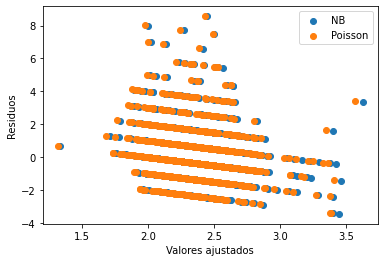

In [338]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Definir los residuos del modelo Poisson
resid_poisson = model_poisson.resid_response

# Definir los residuos del modelo Binomial Negativo
resid_nb = model_nb.resid_response

plt.scatter(model_nb.fittedvalues, resid_nb, label='NB')
plt.scatter(model_poisson.fittedvalues, resid_poisson, label='Poisson')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.legend()
plt.show()

In [339]:
from scipy.stats import chi2

# Calcular la prueba de razón de verosimilitud
deg_free = model_nb.df_resid - model_poisson.df_resid  # Diferencia de grados de libertad
lr = -2 * (model_poisson.llf - model_nb.llf)  # Estadístico de la prueba
p = chi2.sf(lr, 1)  # Valor p

# Imprimir resultados
print("Chi-cuadrado:", lr)
print("Valor p:", p)

Chi-cuadrado: -701.5895828210196
Valor p: 1.0
